#                        Problem Statement

##                       BASIC STATISTICS### 
Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataseortion of the transformed dataset.


#### Introduction
##### ●	To perform descriptive analytics, visualize data distributions, and preprocess the dataset for further analysis.


#### Descriptive Analytics for Numerical Columns
##### ●	Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.
##### ●	Steps:
#####       Load the dataset into a data analysis tool or programming environment (e.g., Python with pandas library).
#####       Identify numerical columns in the dataset.
#####       Calculate the mean, median, mode, and standard deviation for these columns.
#####       Provide a brief interpretation of these statistics.

#### Data Visualization
##### ●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.
##### ●	Histograms:
#####      Plot histograms for each numerical column.
#####      Analyze the distribution (e.g., skewness, presence of outliers) and provide inferences.
##### ●	Boxplots:
#####      Create boxplots for numerical variables to identify outliers and the interquartile range.
#####      Discuss any findings, such as extreme values or unusual distributions.
##### ●	Bar Chart Analysis for Categorical Column:
#####     Identify categorical columns in the dataset.
#####     Create bar charts to visualize the frequency or count of each category.
#####     Analyze the distribution of categories and provide insights.


#### Standardization of Numerical Variables
##### ●	Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.
##### ●	Steps:
#####     Explain the concept of standardization (z-score normalization).
#####     Standardize the numerical columns using the formula: z=x-mu/sigma
	
#####     Show before and after comparisons of the data distributions.


#### Conversion of Categorical Data into Dummy Variables
##### ●	Objective: To transform categorical variables into a format that can be provided to ML algorithms.
##### ●	Steps:
#####     Discuss the need for converting categorical data into dummy variables (one-hot encoding).
#####     Apply one-hot encoding to the categorical columns, creating binary (0 or 1) columns for each category.
#####     Display a portion of the transformed dataset.


In [156]:
import pandas as pd                  # importing pandas library for data manipulation
import numpy as np                   # importing numpy library for numerical calculations
import matplotlib.pyplot as plt      # importing matplotlib library for visualizations
import seaborn as sns                # importing seabon library for visualizations
from scipy.stats import skew         # importing spicy library for checking skewness

In [157]:
# Reading the csv file
SD = pd.read_csv("sales_data_with_discounts.csv")

In [158]:
# Displaying the dataframe
SD

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [159]:
# Checking who many rows and columns are there in a data set
SD.shape

(450, 13)

In [160]:
# finding the data types of each column
SD.dtypes

Date                  object
Day                   object
SKU                   object
City                  object
Volume                 int64
BU                    object
Brand                 object
Model                 object
Avg Price              int64
Total Sales Value      int64
Discount Rate (%)    float64
Discount Amount      float64
Net Sales Value      float64
dtype: object

In [161]:
# Deleting the unwanted columns from the dataset
SD = SD.drop(["Date", "SKU", "City"], axis = 1)

In [162]:
# Displaying the dataFrame after deleting the unwanted columns
SD

,Day,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,Thursday,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,Thursday,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,Thursday,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,Thursday,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,Thursday,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...
445,Thursday,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,Thursday,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,Thursday,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,Thursday,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [163]:
# Checking for the size of the dataframe after deleting the unwanted columns
SD.shape

(450, 10)

In [164]:
# Summary statistics for each numerical column in dataframe
SD.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [165]:
# Displaying the column names present in the dataframe
SD.columns

Index(['Day', 'Volume', 'BU', 'Brand', 'Model', 'Avg Price',
       'Total Sales Value', 'Discount Rate (%)', 'Discount Amount',
       'Net Sales Value'],
      dtype='object')

In [171]:
# Dividing numerical and categorical columns
num_cols = ["Volume", "Avg Price", "Total Sales Value", "Discount Rate (%)", "Discount Amount"]
remaining_cols = SD.columns.difference(num_cols)
target_col = ["Net Sales Value"]
cat_cols = remaining_cols.difference(target_col)

In [172]:
# Printing the catgorical and numerical column names after dividing
print(" ************ NUMERICAL COLUMNS ************ ")
print(num_cols, "\n")
print(" ************ CATEGORICAL COLUMNS ************ ")
print(cat_cols)

 ************ NUMERICAL COLUMNS ************ 
['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount'] 

 ************ CATEGORICAL COLUMNS ************ 
Index(['BU', 'Brand', 'Day', 'Model'], dtype='object')


C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


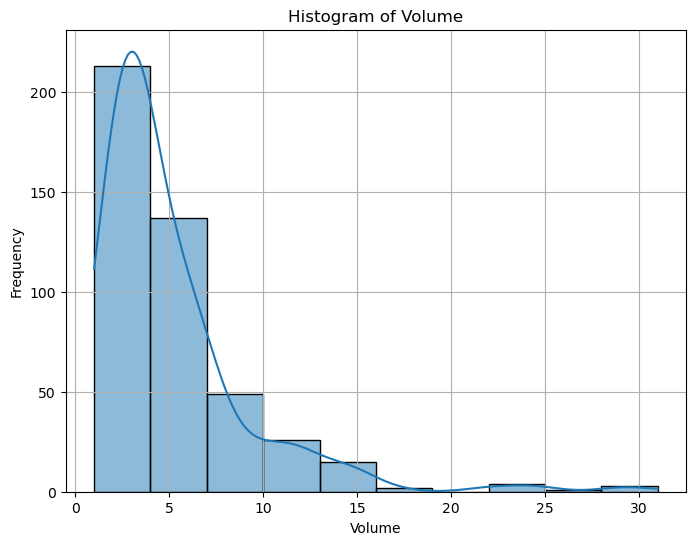

C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness of Volume: 2.72
The Volume distribution is highly positively skewed.
Outliers detected in Volume:
15
13
11
29
13
24
14
12
25
15
11
15
14
12
12
12
22
11
11
12
12
14
11
11
15
31
12
16
24
11
12
12
22
11
13
15
12
14
14
11
29
15
13
17

--------------------------------------------------



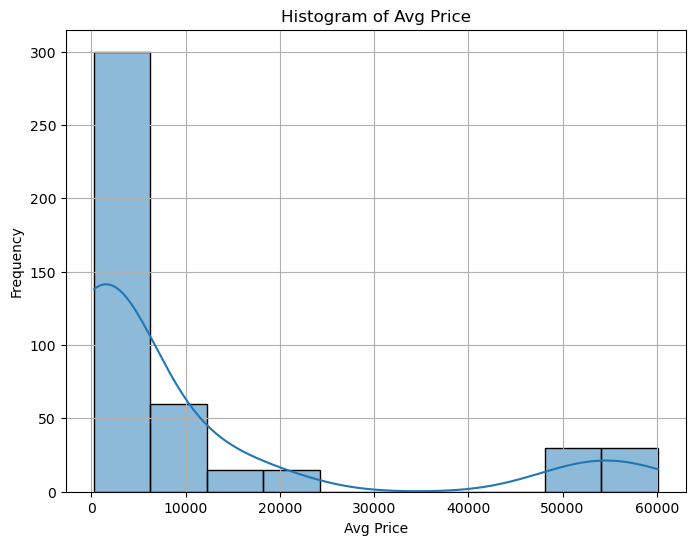

Skewness of Avg Price: 1.90
The Avg Price distribution is highly positively skewed.
Outliers detected in Avg Price:
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100
49100
54100
55100
60100

--------------------------------------------------



C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


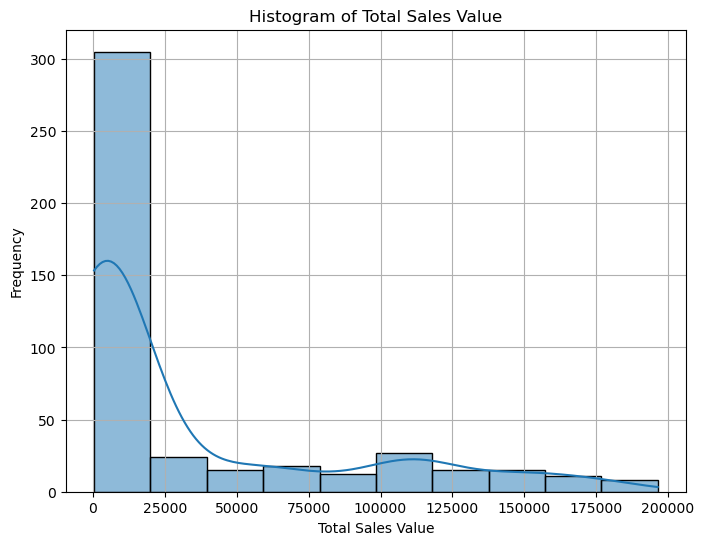

Skewness of Total Sales Value: 1.53
The Total Sales Value distribution is highly positively skewed.
Outliers detected in Total Sales Value:
181500
147300
180300
133100
147300
165300
180300
196400
147300
147300
162300
162300
145200
147300
162300
165300
180300
169400
147300
181500
140700
147300
165300
145200
147300
165300
180300
165300
180300
140700
147300
133100
147300
157300
147300
165300

--------------------------------------------------



C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


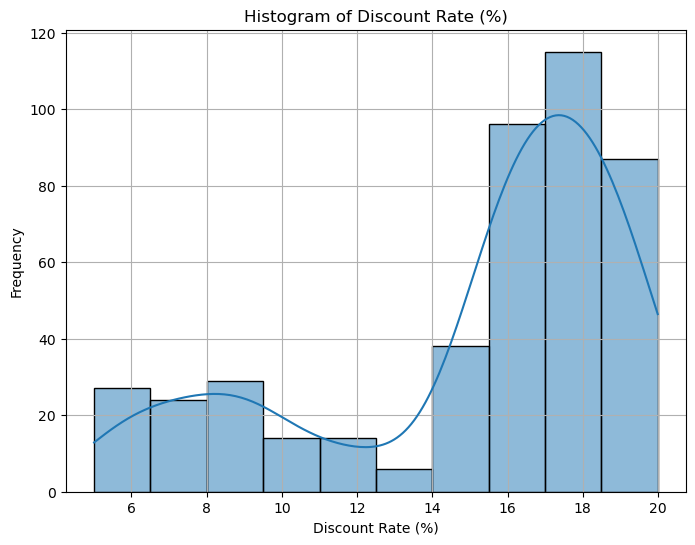

Skewness of Discount Rate (%): -1.06
The Discount Rate (%) distribution is highly negatively skewed.
Outliers detected in Discount Rate (%):
6.935385
5.553719
7.410104
6.214888
5.252113
7.621791
5.007822
5.870671
6.710454
6.095201
5.935084
7.584591
7.732667
7.233847
5.420507
6.849976
7.256696
7.178726
7.679386
5.794802
5.059801
6.858255
7.208363
7.341874
6.473305
6.439920
7.421326
6.268914
6.819111
6.170398
5.072124
6.106931
6.508719
6.066192
5.084108
6.326892
6.415230
5.055218
5.411802
5.511042
5.485157
5.466379
6.008200
6.642595
5.425911

--------------------------------------------------



C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


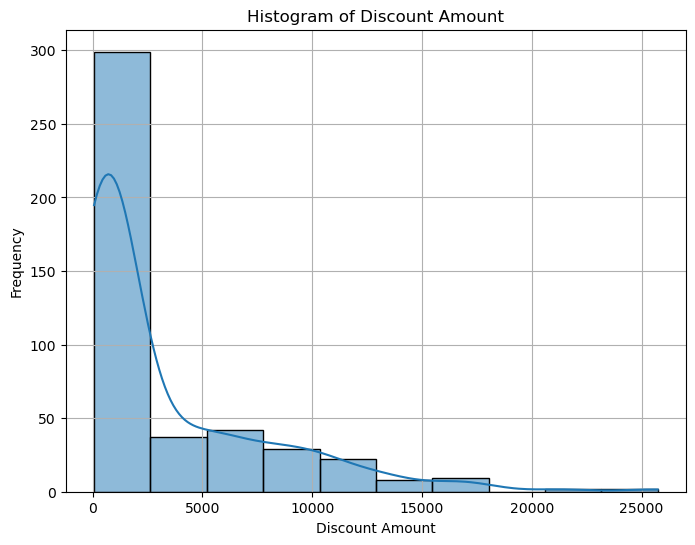

Skewness of Discount Amount: 1.91
The Discount Amount distribution is highly positively skewed.
Outliers detected in Discount Amount:
21153.498820
13594.039719
17900.983733
17445.603828
13951.660194
16384.029009
16892.520951
15214.643324
12622.503658
17178.331859
12753.565958
13999.938499
17696.813621
25328.224204
13608.238319
25738.022194
21496.675367
16332.919930
14036.838652
12734.009012
13275.780741
16218.594720
13382.227333
15984.732281

--------------------------------------------------



In [173]:
# Creating the histogram for each column in dataframe before standardizing and dummification
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(SD[col], kde=True, bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # Analyze the distribution
    skewness = skew(SD[col])
    print(f'Skewness of {col}: {skewness:.2f}')
    
    # Basic inference
    if skewness > 1:
        print(f'The {col} distribution is highly positively skewed.')
    elif skewness < -1:
        print(f'The {col} distribution is highly negatively skewed.')
    elif 0.5 < skewness <= 1 or -1 <= skewness < -0.5:
        print(f'The {col} distribution is moderately skewed.')
    else:
        print(f'The {col} distribution is approximately symmetric.')
    
    # Check for outliers
    q1 = SD[col].quantile(0.25)
    q3 = SD[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = SD[(SD[col] < lower_bound) | (SD[col] > upper_bound)][col]
    
    if not outliers.empty:
        print(f'Outliers detected in {col}:')
        print(outliers.to_string(index=False))
    else:
        print(f'No significant outliers detected in {col}.')

    print('\n' + '-'*50 + '\n')

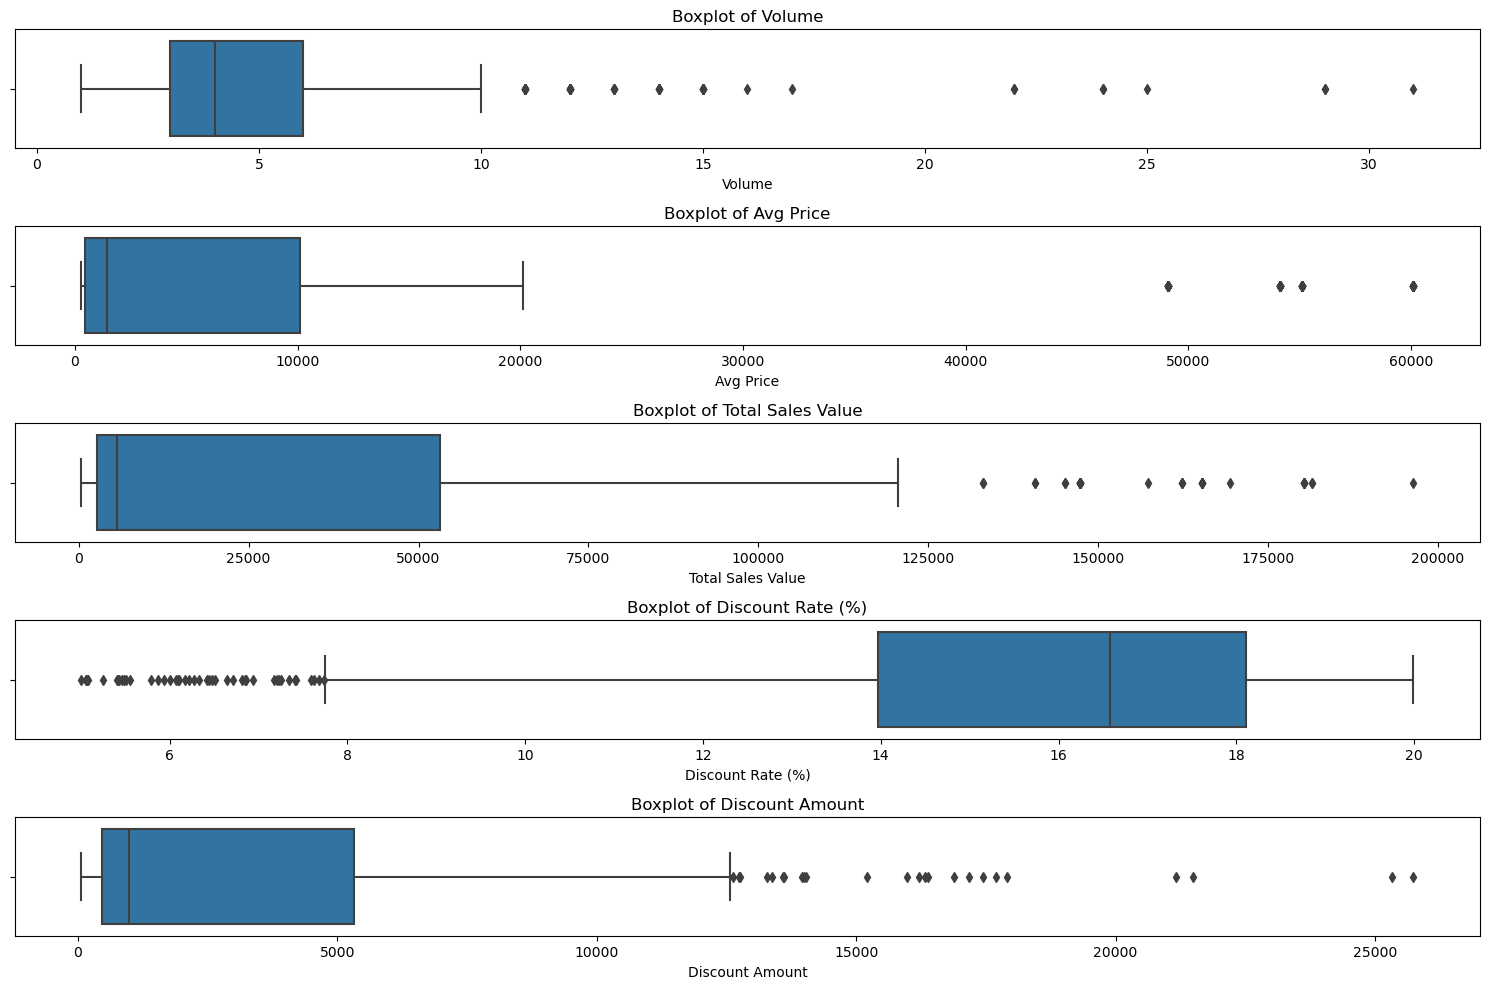

Volume:
Q1: 3.0
Q3: 6.0
IQR: 3.0
Lower Bound: -1.5
Upper Bound: 10.5
Number of outliers: 44

Avg Price:
Q1: 465.0
Q3: 10100.0
IQR: 9635.0
Lower Bound: -13987.5
Upper Bound: 24552.5
Number of outliers: 60

Total Sales Value:
Q1: 2700.0
Q3: 53200.0
IQR: 50500.0
Lower Bound: -73050.0
Upper Bound: 128950.0
Number of outliers: 36

Discount Rate (%):
Q1: 13.965062543701741
Q3: 18.114718477752703
IQR: 4.149655934050962
Lower Bound: 7.740578642625298
Upper Bound: 24.339202378829146
Number of outliers: 45

Discount Amount:
Q1: 460.4593038855329
Q3: 5316.4954266866525
IQR: 4856.03612280112
Lower Bound: -6823.594880316146
Upper Bound: 12600.54961088833
Number of outliers: 24



In [174]:
# Create boxplots for each numerical variable before standardizing and dummification
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=SD[var])
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
plt.tight_layout()
plt.show()

# Display summary statistics to identify outliers
for var in num_cols:
    Q1 = SD[var].quantile(0.25)
    Q3 = SD[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = SD[(SD[var] < lower_bound) | (SD[var] > upper_bound)]
    print(f'{var}:\nQ1: {Q1}\nQ3: {Q3}\nIQR: {IQR}\nLower Bound: {lower_bound}\nUpper Bound: {upper_bound}\nNumber of outliers: {outliers.shape[0]}\n')


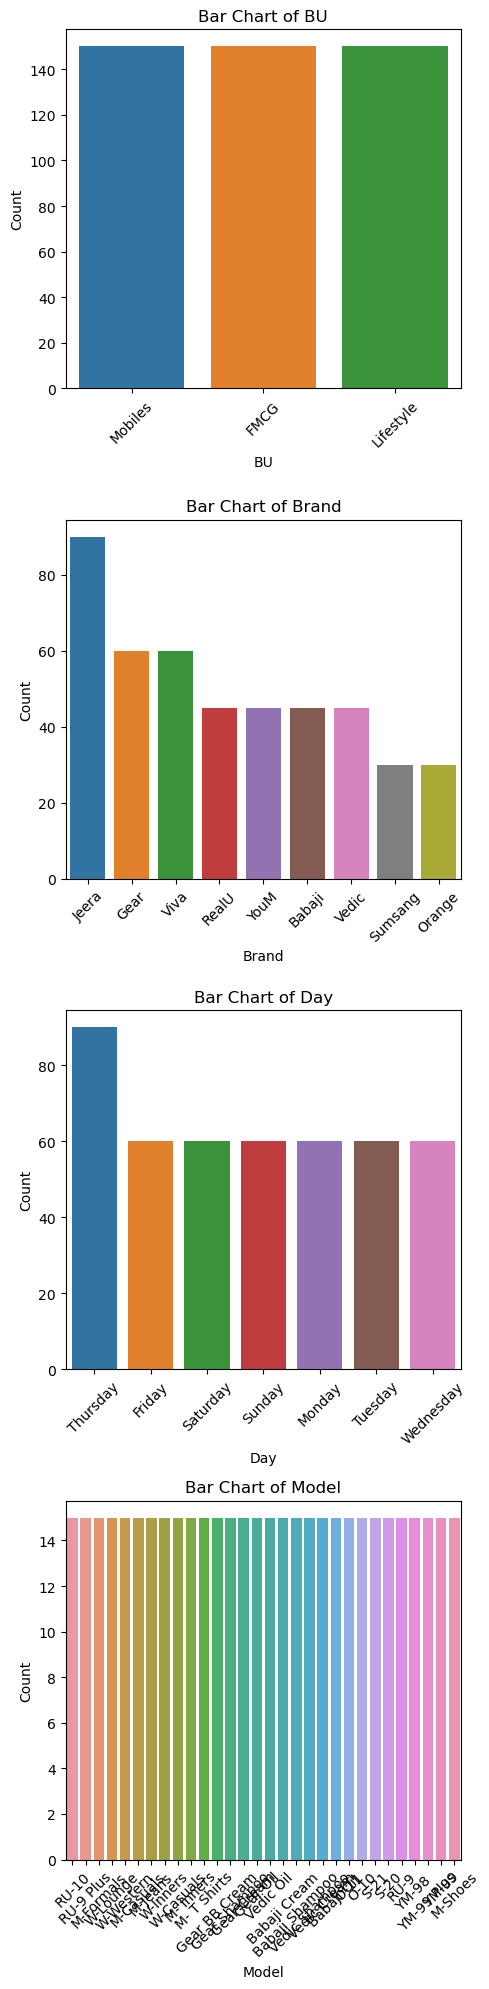


Distribution of BU:
BU
Mobiles      150
FMCG         150
Lifestyle    150
Name: count, dtype: int64

Distribution of Brand:
Brand
Jeera      90
Gear       60
Viva       60
RealU      45
YouM       45
Babaji     45
Vedic      45
Sumsang    30
Orange     30
Name: count, dtype: int64

Distribution of Day:
Day
Thursday     90
Friday       60
Saturday     60
Sunday       60
Monday       60
Tuesday      60
Wednesday    60
Name: count, dtype: int64

Distribution of Model:
Model
RU-10             15
RU-9 Plus         15
M-Formals         15
W-Lounge          15
W-Western         15
M-Casuals         15
M-Jeans           15
W-Inners          15
W-Casuals         15
M- Inners         15
M- T Shirts       15
Gear BB Cream     15
Gear Shampoo      15
Gear Cream        15
Gear Oil          15
Vedic Oil         15
Babaji Cream      15
Babaji Shampoo    15
Vedic Shampoo     15
Vedic Cream       15
Babaji Oil        15
O-11              15
O-10              15
S-21              15
S-20              1

In [175]:
# Create bar charts for each categorical variable before standardizing and dummification
plt.figure(figsize=(5, 20))
for i, var in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    sns.countplot(x=SD[var], order=SD[var].value_counts().index)
    plt.title(f'Bar Chart of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze the distribution of categories
for var in cat_cols:
    print(f'\nDistribution of {var}:')
    print(SD[var].value_counts())

In [176]:
# Dividing the Independant and dependent variables as X and y 
X = SD.drop(["Net Sales Value"], axis = 1)
y = SD["Net Sales Value"]

In [177]:
# Printing only the X variables
X

,Day,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount
0,Thursday,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820
1,Thursday,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961
2,Thursday,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157
3,Thursday,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702
4,Thursday,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230
...,...,...,...,...,...,...,...,...,...
445,Thursday,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873
446,Thursday,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242
447,Thursday,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606
448,Thursday,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826


In [178]:
# Printing only the y variable
pd.DataFrame(y)

,Net Sales Value
0,160346.501180
1,89323.897039
2,102042.089843
3,112235.925298
4,19927.053770
...,...
445,2197.632127
446,12939.103758
447,2593.102394
448,4742.798174


In [179]:
# Standardising the each numerical columns in a dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(X[num_cols])
std_SD = pd.DataFrame(scaler.transform(X[num_cols]), columns = X[num_cols].columns)

In [180]:
# Dsplaying the standardized columns after standardization
std_SD

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount
0,2.350029,0.091173,2.925721,-0.830289,3.952816
1,1.167129,-0.019570,1.330995,-0.852661,1.849014
2,0.457388,0.312659,1.562775,-1.351631,1.622995
3,0.220808,0.534146,1.719276,-1.949723,1.113807
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852
...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379


In [187]:
std_SD = std_SD.reset_index()
std_SD

,index,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount
0,0,2.350029,0.091173,2.925721,-0.830289,3.952816
1,1,1.167129,-0.019570,1.330995,-0.852661,1.849014
2,2,0.457388,0.312659,1.562775,-1.351631,1.622995
3,3,0.220808,0.534146,1.719276,-1.949723,1.113807
4,4,-0.488932,-0.130313,-0.188452,0.673739,0.227852
...,...,...,...,...,...,...
445,445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541
446,446,0.220808,-0.434857,-0.360801,0.451097,-0.152191
447,447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140
448,448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379


In [188]:
std_SD = std_SD.drop(["index"], axis = 1)
std_SD

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount
0,2.350029,0.091173,2.925721,-0.830289,3.952816
1,1.167129,-0.019570,1.330995,-0.852661,1.849014
2,0.457388,0.312659,1.562775,-1.351631,1.622995
3,0.220808,0.534146,1.719276,-1.949723,1.113807
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852
...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379


In [184]:
# Creating the dummies for each categorical column in a dataframe
dummies_cat = pd.get_dummies(SD[cat_cols], drop_first = True)
# Displaying the categorical columns after creating the dummies
dummies_cat

,BU_Lifestyle,BU_Mobiles,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
447,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
448,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [189]:
dummies_cat = dummies_cat.reset_index()
dummies_cat

,index,BU_Lifestyle,BU_Mobiles,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,445,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,446,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
447,447,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
448,448,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [190]:
dummies_cat = dummies_cat.drop(["index"], axis = 1)
dummies_cat

,BU_Lifestyle,BU_Mobiles,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
447,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
448,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [191]:
# Convert boolean columns to integers (0 and 1)
dummies_cat = dummies_cat.astype(int)

# Display the transformed DataFrame
print("\nTransformed DataFrame with 0 and 1:")
dummies_cat


Transformed DataFrame with 0 and 1:


,BU_Lifestyle,BU_Mobiles,Brand_Gear,Brand_Jeera,Brand_Orange,Brand_RealU,Brand_Sumsang,Brand_Vedic,Brand_Viva,Brand_YouM,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
447,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
448,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
final_df = pd.concat([std_SD, dummies_cat], axis = 1)
final_df

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,BU_Lifestyle,BU_Mobiles,Brand_Gear,Brand_Jeera,Brand_Orange,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,2.350029,0.091173,2.925721,-0.830289,3.952816,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.457388,0.312659,1.562775,-1.351631,1.622995,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.220808,0.534146,1.719276,-1.949723,1.113807,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


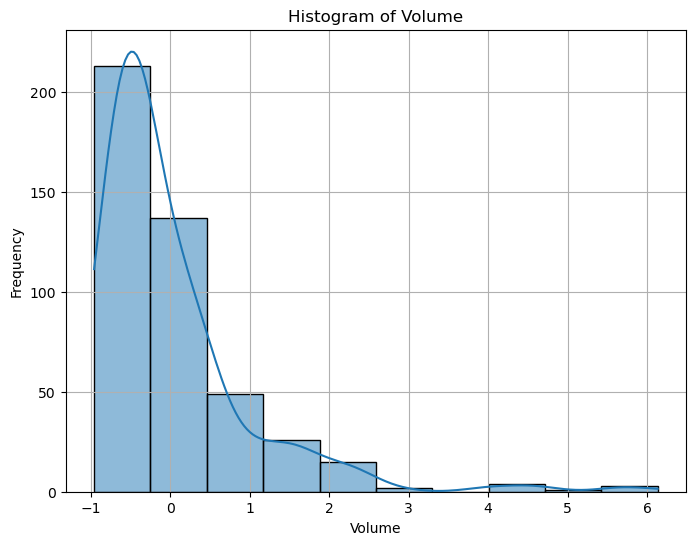

Skewness of Volume: 2.72
The Volume distribution is highly positively skewed.
Outliers detected in Volume:
2.350029
1.876869
1.403709
5.662151
1.876869
4.479250
2.113449
1.640289
4.715830
2.350029
1.403709
2.350029
2.113449
1.640289
1.640289
1.640289
4.006090
1.403709
1.403709
1.640289
1.640289
2.113449
1.403709
1.403709
2.350029
6.135311
1.640289
2.586609
4.479250
1.403709
1.640289
1.640289
4.006090
1.403709
1.876869
2.350029
1.640289
2.113449
2.113449
1.403709
5.662151
2.350029
1.876869
2.823189

--------------------------------------------------



C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


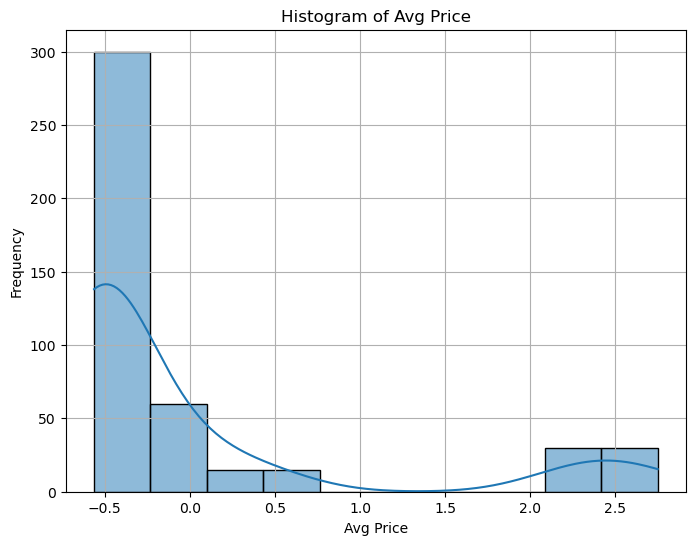

Skewness of Avg Price: 1.90
The Avg Price distribution is highly positively skewed.
Outliers detected in Avg Price:
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009
2.139922
2.416780
2.472151
2.749009

--------------------------------------------------



C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


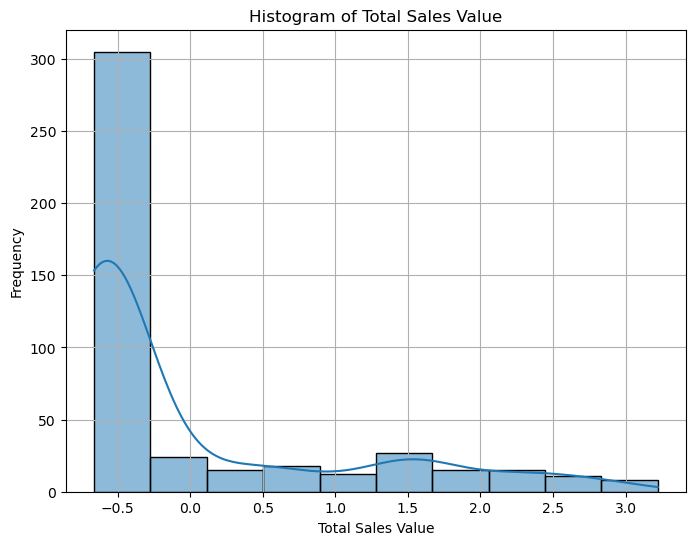

C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness of Total Sales Value: 1.53
The Total Sales Value distribution is highly positively skewed.
Outliers detected in Total Sales Value:
2.925721
2.248210
2.901949
1.966905
2.248210
2.604795
2.901949
3.220894
2.248210
2.248210
2.545364
2.545364
2.206609
2.248210
2.545364
2.604795
2.901949
2.686017
2.248210
2.925721
2.117463
2.248210
2.604795
2.206609
2.248210
2.604795
2.901949
2.604795
2.901949
2.117463
2.248210
1.966905
2.248210
2.446313
2.248210
2.604795

--------------------------------------------------



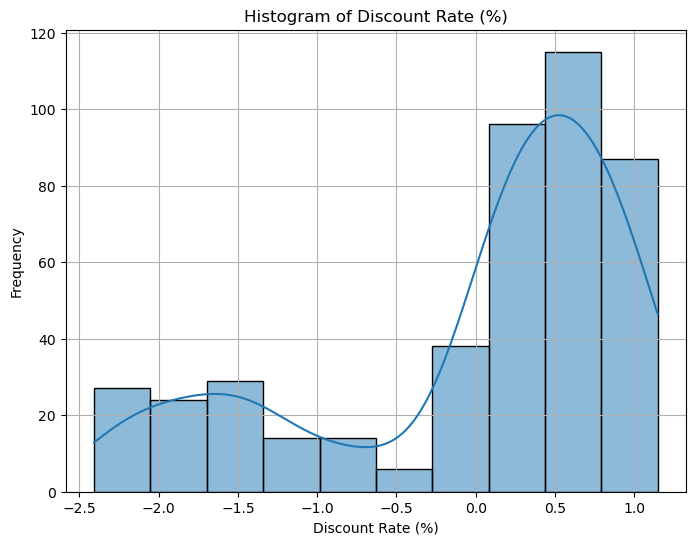

Skewness of Discount Rate (%): -1.06
The Discount Rate (%) distribution is highly negatively skewed.
Outliers detected in Discount Rate (%):
-1.949723
-2.277450
-1.837121
-2.120623
-2.348990
-1.786910
-2.406935
-2.202270
-2.003076
-2.149012
-2.186991
-1.795734
-1.760610
-1.878929
-2.309047
-1.969982
-1.873509
-1.892003
-1.773249
-2.220266
-2.394605
-1.968018
-1.884974
-1.853305
-2.059327
-2.067246
-1.834460
-2.107808
-1.977303
-2.131175
-2.391682
-2.146230
-2.050927
-2.155893
-2.388840
-2.094056
-2.073102
-2.395692
-2.311112
-2.287572
-2.293712
-2.298166
-2.169648
-2.019172
-2.307765

--------------------------------------------------



C:\Users\DILEEP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


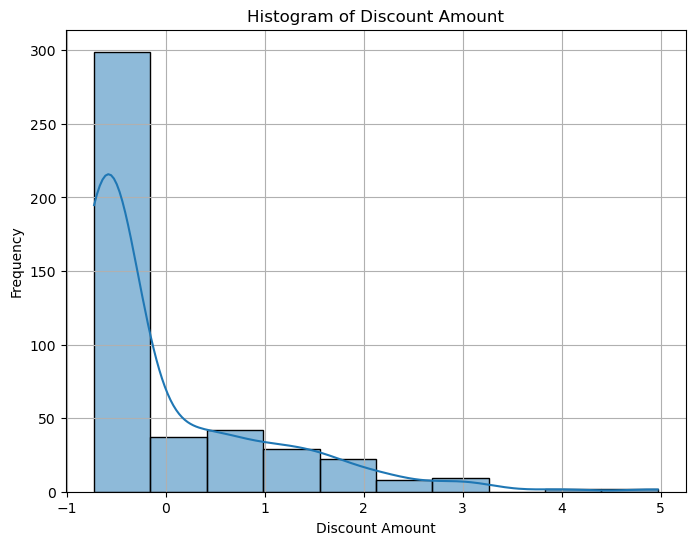

Skewness of Discount Amount: 1.91
The Discount Amount distribution is highly positively skewed.
Outliers detected in Discount Amount:
3.952816
2.274760
3.230820
3.129734
2.354145
2.894084
3.006960
2.634503
2.059097
3.070405
2.088190
2.364862
3.185498
4.879526
2.277912
4.970494
4.028995
2.882739
2.373053
2.083849
2.204112
2.857361
2.227741
2.805448

--------------------------------------------------



In [193]:
# Creating the histogram for each colum in dataframe
for col in std_SD:
    plt.figure(figsize=(8, 6))
    sns.histplot(std_SD[col], kde=True, bins=10)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    
    # Analyze the distribution
    skewness = skew(std_SD[col])
    print(f'Skewness of {col}: {skewness:.2f}')
    
    # Basic inference
    if skewness > 1:
        print(f'The {col} distribution is highly positively skewed.')
    elif skewness < -1:
        print(f'The {col} distribution is highly negatively skewed.')
    elif 0.5 < skewness <= 1 or -1 <= skewness < -0.5:
        print(f'The {col} distribution is moderately skewed.')
    else:
        print(f'The {col} distribution is approximately symmetric.')
    
    # Check for outliers
    q1 = std_SD[col].quantile(0.25)
    q3 = std_SD[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = std_SD[(std_SD[col] < lower_bound) | (std_SD[col] > upper_bound)][col]
    
    if not outliers.empty:
        print(f'Outliers detected in {col}:')
        print(outliers.to_string(index=False))
    else:
        print(f'No significant outliers detected in {col}.')

    print('\n' + '-'*50 + '\n')

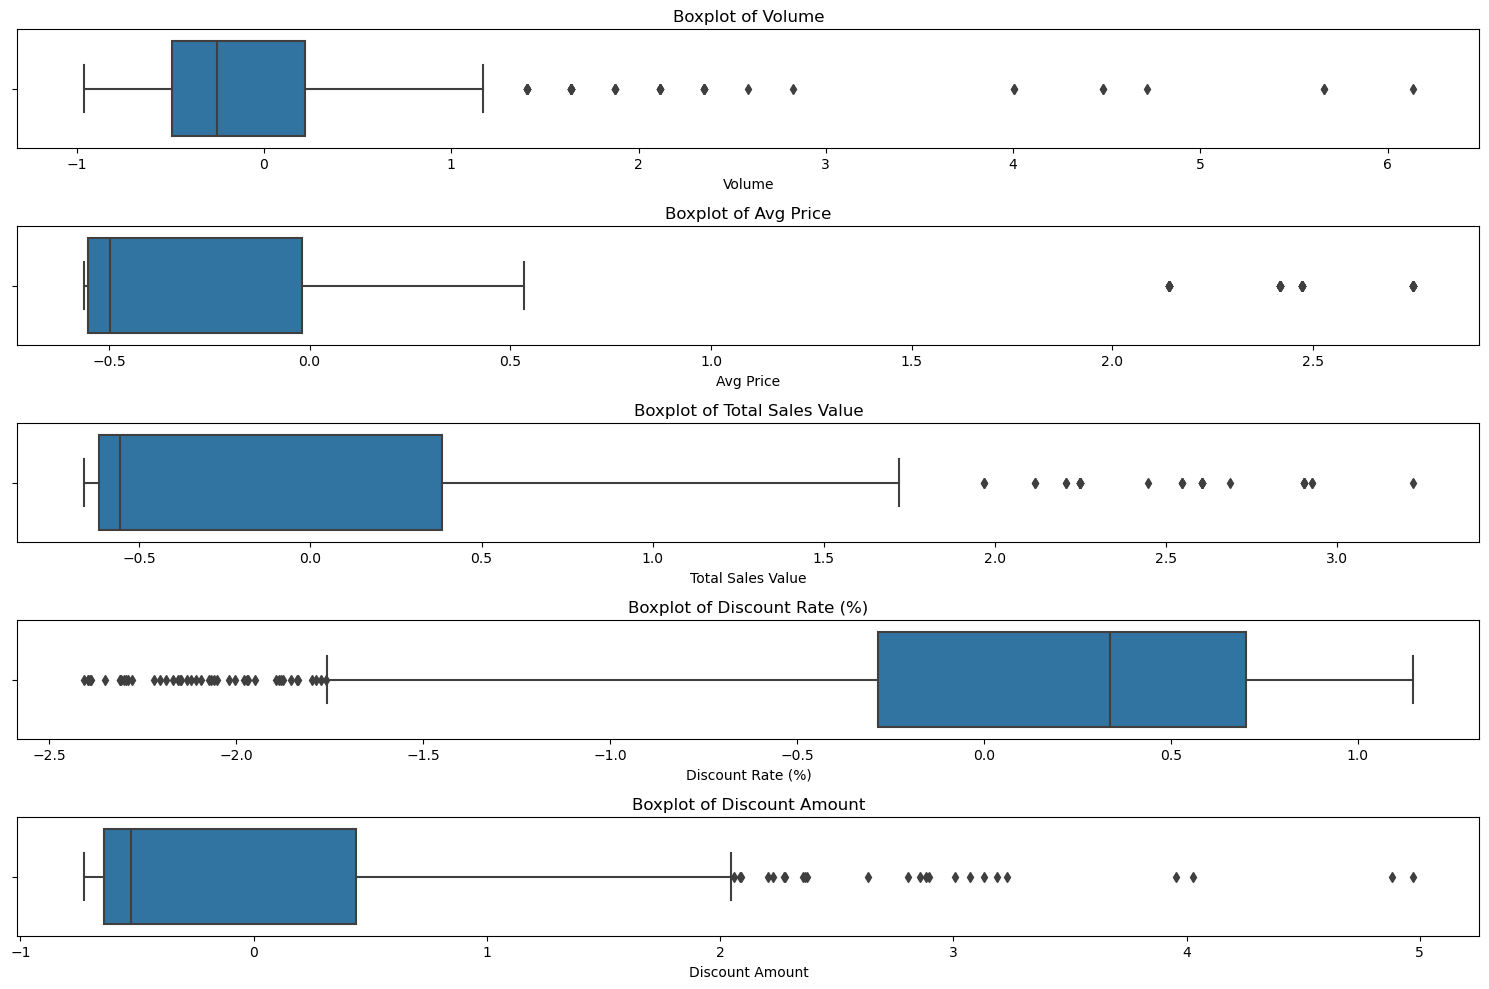

Volume:
Q1: -0.48893223085429655
Q3: 0.22080810425677916
IQR: 0.7097403351110757
Lower Bound: -1.55354273352091
Upper Bound: 1.2854186069233926
Number of outliers: 44

Avg Price:
Q1: -0.5530753736006455
Q3: -0.019570163443341566
IQR: 0.5335052101573039
Lower Bound: -1.3533331888366014
Upper Bound: 0.7806876517926142
Number of outliers: 60

Total Sales Value:
Q1: -0.6163533665697751
Q3: 0.3840647713461619
IQR: 1.0004181379159371
Lower Bound: -2.116980573443681
Upper Bound: 1.8846919782200677
Number of outliers: 36

Discount Rate (%):
Q1: -0.28230663255419747
Q3: 0.7019781236860286
IQR: 0.9842847562402262
Lower Bound: -1.7587337669145366
Upper Bound: 2.178405258046368
Number of outliers: 45

Discount Amount:
Q1: -0.6406461978482105
Q3: 0.4373017685139508
IQR: 1.0779479663621614
Lower Bound: -2.257568147391453
Upper Bound: 2.0542237180571927
Number of outliers: 24



In [198]:
# Create boxplots for each numerical variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=final_df[var])
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
plt.tight_layout()
plt.show()

# Display summary statistics to identify outliers
for var in num_cols:
    Q1 = final_df[var].quantile(0.25)
    Q3 = final_df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = final_df[(final_df[var] < lower_bound) | (final_df[var] > upper_bound)]
    print(f'{var}:\nQ1: {Q1}\nQ3: {Q3}\nIQR: {IQR}\nLower Bound: {lower_bound}\nUpper Bound: {upper_bound}\nNumber of outliers: {outliers.shape[0]}\n')


## CONCLUSION

### Descriptive Analytics: 
##### Provided valuable insights into the dataset's numerical and categorical distributions.
### Data Visualization: 
##### Highlighted outliers, skewness, and popular categories.
### Standardization: 
##### Ensured uniform scaling of numerical variables.
### One-Hot Encoding: 
##### Converted categorical variables into a machine learning-friendly format.
##### Data preprocessing steps like standardization and one-hot encoding are crucial for effective data analysis and machine learning model performance.